In [1]:
###MSc In Big Data and Business Analytics - 2021###
import pandas as pd
import numpy as np
import dtale
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#load the datasets
train = pd.read_csv('/Users/romeoleon/Desktop/ESCP/Cours/Machine Learning with Python/Assignment/train.csv',parse_dates=['visitTime'])
test = pd.read_csv('/Users/romeoleon/Desktop/ESCP/Cours/Machine Learning with Python/Assignment/test.csv')

# Explore the datasets 

In [3]:
train.shape

(31428, 27)

In [22]:
train.head()

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,-1,61518,19297675,-1,6,928106152,2541203883,3606287998,306394936,2967512603,...,0,0,0,0,0,0,0,1083418268,3831440054,830706566
1,-1,356604,19320277,-1,12,3382400190,2018710401,1302581498,2308170622,2967512603,...,2,0,0,0,6,0,0,2993954402,2379633508,1284343215
2,-1,603441,19346318,-1,20,2569487005,2018710401,4121075497,2210625817,2967512603,...,0,0,0,0,0,0,0,1601090997,3617851689,4220791646
3,-1,192754,19308171,-1,9,2569487005,2018710401,3531445293,652481754,2967512603,...,0,0,0,0,0,0,0,4114483006,3617851689,4220791646
4,-1,210892,19309442,-1,9,1659166197,2018710401,1047694444,2210625817,2967512603,...,0,0,0,0,0,0,0,1971402551,2196958187,830706566


In [3]:
#Convert the timestamp visitTime (given in second) to datetime
train['visitTime'] = pd.to_datetime(train['visitTime'],unit='s')

In [4]:
#Extract the hour, minute and second from visiTime
train['hour_vt'] = train['visitTime'].dt.hour
train['minute_vt'] = train['visitTime'].dt.minute
train['second_vt'] = train['visitTime'].dt.second

In [5]:
#Drop the visitTime
train.drop(columns='visitTime',inplace=True)

In [6]:
train.head()

,label,id,purchaseTime,hour,C1,C2,C3,C4,C5,C6,...,N7,N8,N9,N10,C10,C11,C12,hour_vt,minute_vt,second_vt
0,-1,61518,-1,6,928106152,2541203883,3606287998,306394936,2967512603,2712499304,...,0,0,0,0,1083418268,3831440054,830706566,8,27,55
1,-1,356604,-1,12,3382400190,2018710401,1302581498,2308170622,2967512603,179712055,...,0,6,0,0,2993954402,2379633508,1284343215,14,44,37
2,-1,603441,-1,20,2569487005,2018710401,4121075497,2210625817,2967512603,2900447837,...,0,0,0,0,1601090997,3617851689,4220791646,21,58,38
3,-1,192754,-1,9,2569487005,2018710401,3531445293,652481754,2967512603,487561405,...,0,0,0,0,4114483006,3617851689,4220791646,11,22,51
4,-1,210892,-1,9,1659166197,2018710401,1047694444,2210625817,2967512603,2712499304,...,0,0,0,0,1971402551,2196958187,830706566,11,44,2


In [7]:
#Redindex the dataframe
col_list = ['label', 'id','hour_vt', 'minute_vt', 'second_vt', 'purchaseTime', 'hour', 'C1', 'C2', 'C3', 'C4', 'C5',
        'C6', 'C7', 'C8', 'C9','C10', 'C11', 'C12','N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8',
        'N9', 'N10']
train = train.reindex(columns=col_list)

In [10]:
train.isna().sum()

label           0
id              0
hour_vt         0
minute_vt       0
second_vt       0
purchaseTime    0
hour            0
C1              0
C2              0
C3              0
C4              0
C5              0
C6              0
C7              0
C8              0
C9              0
C10             0
C11             0
C12             0
N1              0
N2              0
N3              0
N4              0
N5              0
N6              0
N7              0
N8              0
N9              0
N10             0
dtype: int64

In [8]:
#Transform the Cn features to categorical ones
train[['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12']] = train[['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12']].astype('category')

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31428 entries, 0 to 31427
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   label         31428 non-null  int64   
 1   id            31428 non-null  int64   
 2   hour_vt       31428 non-null  int64   
 3   minute_vt     31428 non-null  int64   
 4   second_vt     31428 non-null  int64   
 5   purchaseTime  31428 non-null  int64   
 6   hour          31428 non-null  int64   
 7   C1            31428 non-null  category
 8   C2            31428 non-null  category
 9   C3            31428 non-null  category
 10  C4            31428 non-null  category
 11  C5            31428 non-null  category
 12  C6            31428 non-null  category
 13  C7            31428 non-null  category
 14  C8            31428 non-null  category
 15  C9            31428 non-null  category
 16  C10           31428 non-null  category
 17  C11           31428 non-null  category
 18  C12   

In [13]:
train.nunique()

label               2
id              31428
hour_vt            24
minute_vt          60
second_vt          60
purchaseTime       58
hour               24
C1              22595
C2                  8
C3               2863
C4                  4
C5                  3
C6                 84
C7                  6
C8                 23
C9                 60
C10             28653
C11                21
C12                19
N1                  6
N2                 16
N3                 21
N4                 21
N5                  7
N6                 20
N7                  6
N8                 64
N9                 32
N10                37
dtype: int64

In [14]:
train.describe()

,label,id,hour_vt,minute_vt,second_vt,purchaseTime,hour,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10
count,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,3.142800e+04,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000
mean,-0.996373,321870.448835,13.488354,29.212549,29.487813,3.504330e+04,11.799701,0.510882,0.419594,0.169849,0.134307,0.002386,0.027269,0.002164,0.415680,0.042319,0.057560
std,0.085098,184665.780120,4.784837,17.439143,17.359608,8.221503e+05,4.695434,1.157846,1.681422,1.286043,1.258795,0.156001,0.562668,0.079745,3.184785,1.008314,1.158253
min,-1.000000,37.000000,0.000000,0.000000,0.000000,-1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,162636.500000,10.000000,14.000000,14.000000,-1.000000e+00,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.000000,322691.500000,13.000000,29.000000,30.000000,-1.000000e+00,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-1.000000,481852.000000,17.000000,44.000000,44.000000,-1.000000e+00,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,638505.000000,23.000000,59.000000,59.000000,1.935732e+07,23.000000,5.000000,15.000000,20.000000,20.000000,20.000000,20.000000,10.000000,97.000000,85.000000,86.000000


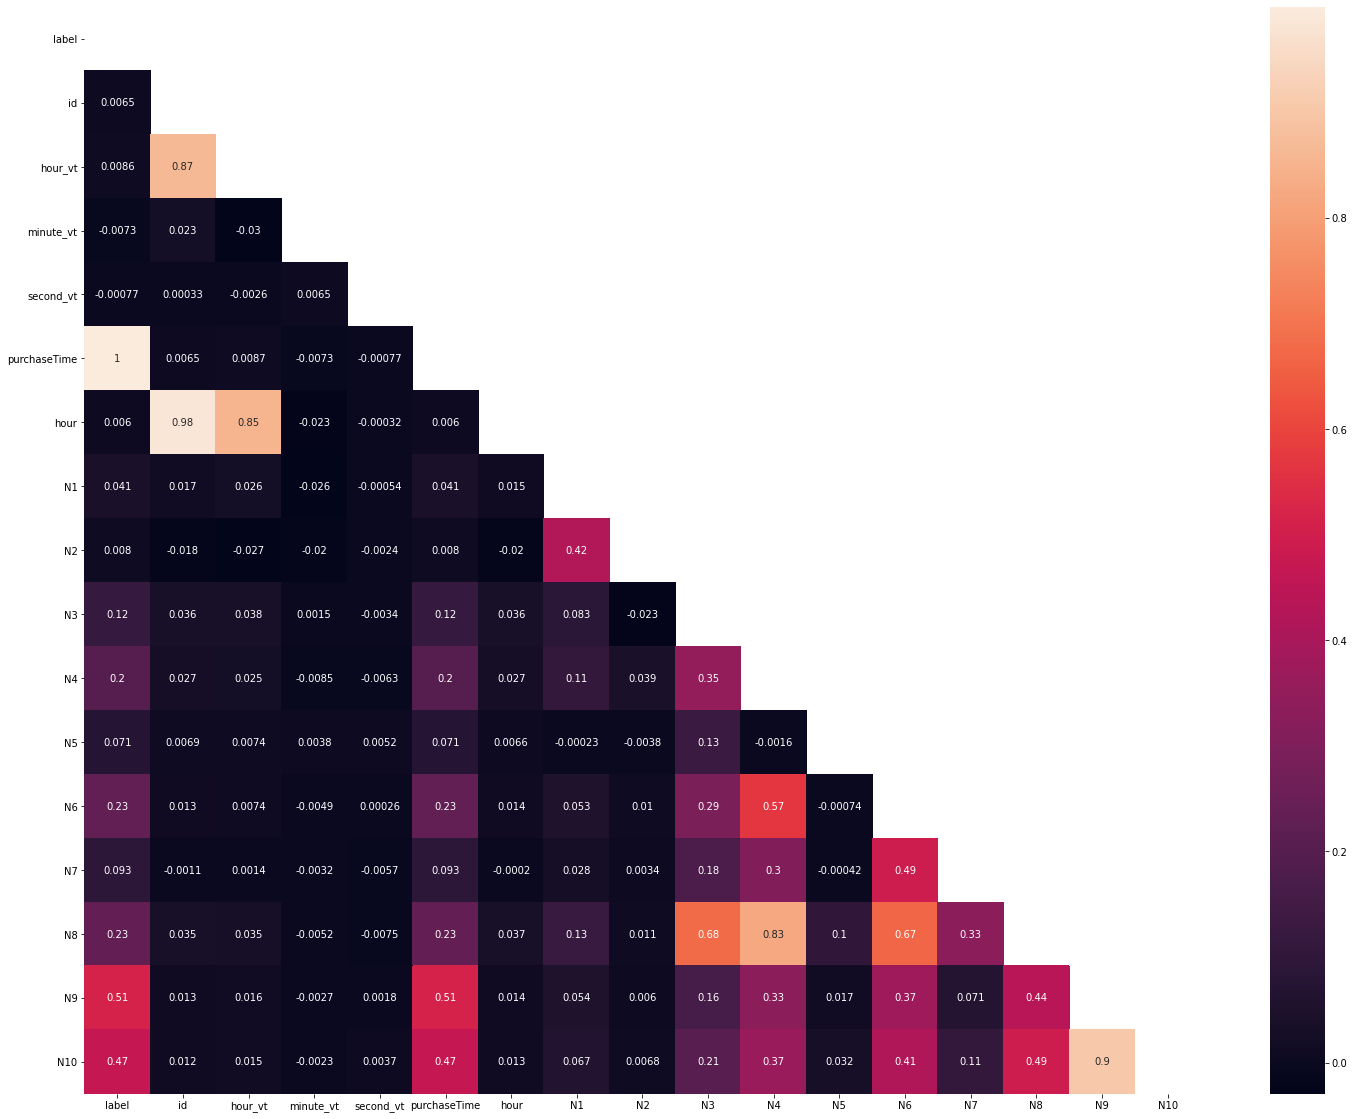

In [9]:
#Correlation analysis, since our target variable only has 2 unique values we can use pearson R
tr_correlation = train.corr()

#Select only bottom of the correlation matrix
mask=np.triu(np.ones(tr_correlation.shape)).astype(np.bool)

#Plot the lower part of the correlation matrix
plt.figure(figsize=(25,20))
sns.heatmap(tr_correlation,mask=mask,annot=True)

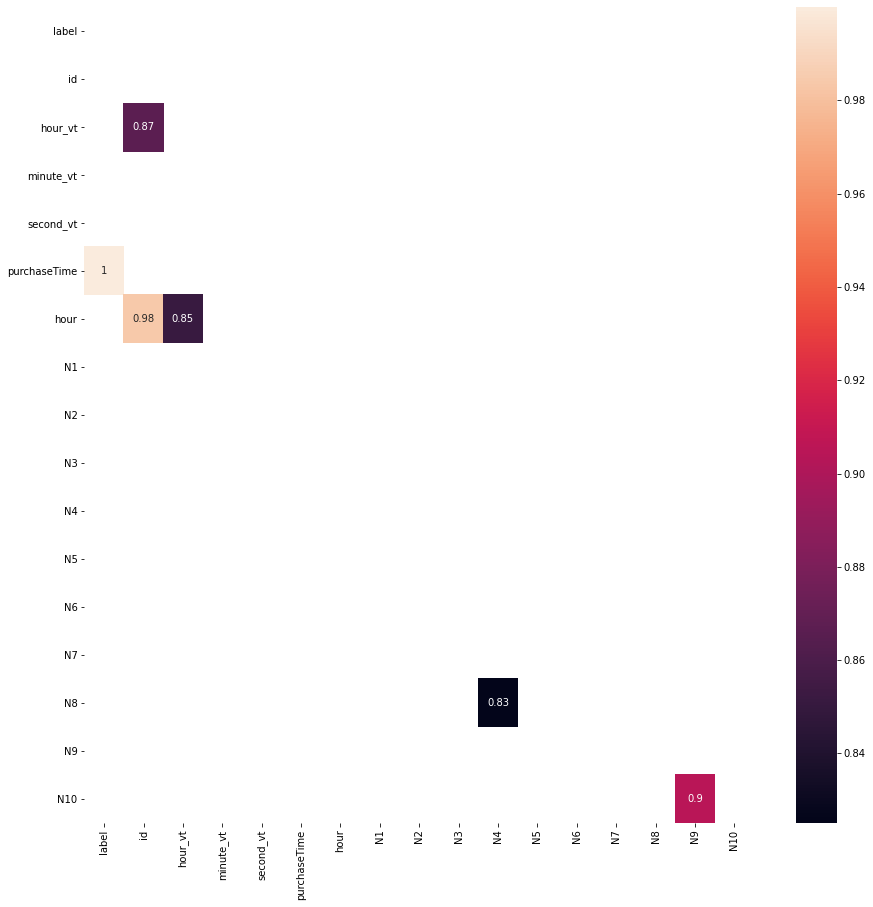

In [10]:
#Plot the top correlations (Above 0.7)
tr_correlation_top = tr_correlation.abs()
tr_correlation_top = tr_correlation_top[tr_correlation_top > 0.7]

#Select only bottom of the correlation matrix
mask_ut=np.triu(np.ones(tr_correlation_top.shape)).astype(np.bool)

#Plot the lower part of the correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(tr_correlation_top,mask=mask_ut,annot=True)

### Here we can see that we have multicolinearity between N4 and N8 | N9 and N10
- Based on the feature importance (code section below), I am going to remove the N10 and N4 features.
- As a reminder, multicolinearity can impact the following algortihm : OLS based, logistic regression, KNN, Naive Bayes

In [11]:
#Select important features regarding the target variable
corr_target = abs(tr_correlation['label'])
relevant_features = corr_target[corr_target > 0.2]
relevant_features

label           1.000000
purchaseTime    1.000000
N4              0.203383
N6              0.230524
N8              0.232069
N9              0.514412
N10             0.470503
Name: label, dtype: float64

### Something interesting to notice here and in the previously generated heatmap is the fact that only a few variables present cases of multicolinearity which occurs only between independent variables. 

### Moreover, the target variable 'label' is correlated (pearson-r = 1) with purchaseTime, hence, this feature predictive power is tremendous and most importantly does not present any case of multicolinearity as 'label' is the dependent variable and 'purchaseTime' independent.

### Hence our independent variables will be 
- purchaseTime  
- N6             
- N8             
- N9             

In [13]:
#Use dtale to perform further EDA
dtrain = dtale.show(train)
dtrain

AttributeError: 'int' object has no attribute 'strip'

### After performing further EDA with d-tale, it seems that the dataset is susbtantially unbalanced (when considering target variable), the class -1 represent the majority of the data, hence, we could perform minority oversampling if this imbalance revealed itself as an issue :
- SMOTE oversampling

# Perform feature engineering

In [12]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train[['N6','N8','N9']] = scaler.fit_transform(train[['N6','N8','N9']])

In [13]:
train.head()

,label,id,hour_vt,minute_vt,second_vt,purchaseTime,hour,C1,C2,C3,...,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10
0,-1,61518,8,27,55,-1,6,928106152,2541203883,3606287998,...,0,0,0,0,0,-0.048464,0,-0.130523,-0.041971,0
1,-1,356604,14,44,37,-1,12,3382400190,2018710401,1302581498,...,1,0,4,2,0,-0.048464,0,1.753465,-0.041971,0
2,-1,603441,21,58,38,-1,20,2569487005,2018710401,4121075497,...,0,0,0,0,0,-0.048464,0,-0.130523,-0.041971,0
3,-1,192754,11,22,51,-1,9,2569487005,2018710401,3531445293,...,0,0,0,0,0,-0.048464,0,-0.130523,-0.041971,0
4,-1,210892,11,44,2,-1,9,1659166197,2018710401,1047694444,...,0,0,0,0,0,-0.048464,0,-0.130523,-0.041971,0


# Perform data selection and machine learning 

In [14]:
#Define the independent and dependent variables
regressors = train[['purchaseTime','N6','N8','N9']]
target = train['label']

In [15]:
#Split the independent and dependent variables
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(regressors,target,test_size=0.2,random_state=42)

### Use of LazyClassifier to detect the best model

In [15]:
from lazypredict.Supervised import LazyClassifier #This package requires scikit-learn==0.23.1

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [03:35<00:00,  7.43s/it]                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 1.00               1.00     1.00      1.00   
BaggingClassifier                  1.00               1.00     1.00      1.00   
XGBClassifier                      1.00               1.00     1.00      1.00   
SGDClassifier                      1.00               1.00     1.00      1.00   
RidgeClassifierCV                  1.00               1.00     1.00      1.00   
RidgeClassifier                    1.00               1.00     1.00      1.00   
RandomForestClassifier             1.00               1.00     1.00      1.00   
QuadraticDiscriminantAnalysis      1.00               1.00     1.00      1.00   
Perceptron                         1.00               1.00     1.00      1.00   
PassiveAggressiveClassifier        1.00               1.00    

### Select the model according to the previously generated lazy classifier values and assess it on the splitted training data

In [17]:
#Instantiate model
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(x_train,y_train)

#Do the prediction
y_pred = ada.predict(x_test)

In [18]:
#Assess the model
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      6279
           1       1.00      1.00      1.00         7

    accuracy                           1.00      6286
   macro avg       1.00      1.00      1.00      6286
weighted avg       1.00      1.00      1.00      6286



# Here we perform data cleaning on test dataset

In [56]:
test.head()

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,-1,25540,19420446,-1,16,2569487005,2018710401,1429850909,2308170622,2967512603,...,0,0,0,0,0,0,0,1887882016,3617851689,4220791646
1,-1,29938,19431062,-1,19,1981742921,1235983246,4203734567,652481754,2116767313,...,0,0,0,0,0,0,0,3375463994,2379633508,1284343215
2,-1,9585,19392956,-1,8,2486871669,1235983246,2776175989,652481754,2116767313,...,0,0,0,0,0,0,0,3441876061,2196958187,1550397227
3,-1,23597,19416124,-1,15,3427628467,1235983246,4172481347,652481754,2116767313,...,0,0,0,0,0,0,0,2835356425,3831440054,1213938795
4,-1,27695,19425109,-1,17,2214885086,2541203883,3948279888,652481754,2967512603,...,0,0,0,0,0,0,0,1453469701,3831440054,830706566


In [19]:
#Convert the timestamp (given in second) to datetime
test['visitTime'] = pd.to_datetime(test['visitTime'],unit='s')

In [20]:
#Extract the hour, minute and second from visiTime
test['hour_vt'] = test['visitTime'].dt.hour
test['minute_vt'] = test['visitTime'].dt.minute
test['second_vt'] = test['visitTime'].dt.second

In [21]:
#Drop the visitTime
test.drop(columns='visitTime',inplace=True)

In [22]:
#Redindex the dataframe
col_list = ['label', 'id','hour_vt', 'minute_vt', 'second_vt', 'purchaseTime', 'hour', 'C1', 'C2', 'C3', 'C4', 'C5',
        'C6', 'C7', 'C8', 'C9','C10', 'C11', 'C12','N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8',
        'N9', 'N10']
test = test.reindex(columns=col_list)

In [61]:
test.head()

,label,id,hour_vt,minute_vt,second_vt,purchaseTime,hour,C1,C2,C3,...,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10
0,-1,25540,18,34,6,-1,16,2569487005,2018710401,1429850909,...,0,0,0,0,0,0,0,0,0,0
1,-1,29938,21,31,2,-1,19,1981742921,1235983246,4203734567,...,0,0,0,0,0,0,0,0,0,0
2,-1,9585,10,55,56,-1,8,2486871669,1235983246,2776175989,...,0,0,0,0,0,0,0,0,0,0
3,-1,23597,17,22,4,-1,15,3427628467,1235983246,4172481347,...,0,0,0,0,0,0,0,0,0,0
4,-1,27695,19,51,49,-1,17,2214885086,2541203883,3948279888,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#standardize the data 
test[['N6','N8','N9']] = scaler.fit_transform(test[['N6','N8','N9']])

# Now we perform classification on the testing dataset

In [24]:
regressors_test = test[['purchaseTime','N6','N8','N9']]

In [25]:
#Create the model to predict probabilities of of classification (model trained on the training dataset)
y_value = ada.predict(regressors_test)
y_proba = ada.predict_proba(regressors_test)

In [26]:
print(classification_report(y_value,test.label))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     32086

    accuracy                           1.00     32086
   macro avg       1.00      1.00      1.00     32086
weighted avg       1.00      1.00      1.00     32086



The classification report might seem odd as we can only see one class from the target variable. STill, after further verification, the 'label' column only contains -1 values, hence, the classifier is working correctly.

In [27]:
#Create a new dataframe containing the id, prediction result and probabilities
df_proba = pd.DataFrame(y_proba,columns=['no_purchase','purchase'])
df_id = pd.DataFrame(test.id)

result = pd.concat([df_id,df_proba],axis=1)
result.head()

,id,no_purchase,purchase
0,25540,1.0,2.220446e-16
1,29938,1.0,2.220446e-16
2,9585,1.0,2.220446e-16
3,23597,1.0,2.220446e-16
4,27695,1.0,2.220446e-16


### We can see that the model is very confident about its prediction as the probability associated with the classification is either 1 for no_purchase or 0 for purchase

In [28]:
final_df = result[['id','purchase']]
final_df.rename(columns={'purchase':'prob'},inplace=True)
final_df.set_index('id',inplace=True)

/Users/romeoleon/Library/Python/3.8/lib/python/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
final_df.to_csv('prediction.csv',float_format='%.1f')

# Smote annex (Solving the imbalance problem)

In [51]:
#The installation of the library might create some conflicts with the Lazypredict library
!pip install imbalanced-learn
!pip install delayed

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 72 kB 881 kB/s 


In [35]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [32]:
#Analyze the distribution of target variable
print("Initial target data distribution: ",Counter(y_train))

Initial data:  Counter({-1: 25092, 1: 50})


In [37]:
#Create the SMOTE instance
SMOTE = SMOTE()

In [77]:
#Get the new data (balanced)
x_train_sm,y_train_sm = SMOTE.fit_resample(x_train,y_train)

In [78]:
#Analyze the distribution of target variable after SMOTE
print("Target data distribution after SMOTE: ",Counter(y_train_sm))

Target data distribution after SMOTE:  Counter({-1: 25092, 1: 25092})


In [79]:
#Create new classifier with balanced data
ada_sm = AdaBoostClassifier()
ada_sm.fit(x_train_sm,y_train_sm)

AdaBoostClassifier()

In [80]:
#Score the new classifier on testing data from train test split
pred_sm = ada_sm.predict(x_test)
prob_sm = ada_sm.predict_proba(x_test)
print(classification_report(y_test,pred_sm))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      6279
           1       1.00      1.00      1.00         7

    accuracy                           1.00      6286
   macro avg       1.00      1.00      1.00      6286
weighted avg       1.00      1.00      1.00      6286



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde2ccde640>,
      dtype=object)

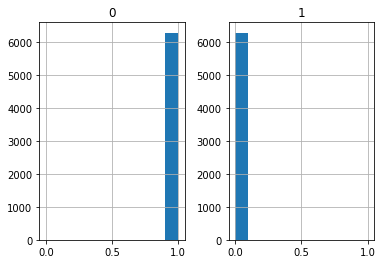

In [81]:
#Create dataframe of the new predicted probabilities
df_prob_sm = pd.DataFrame(prob_sm)
df_prob_sm.hist()

In [70]:
#Predict the test set data
predictions_test_set_sm = ada_sm.predict_proba(regressors_test)

,0,1
0,1.0,2.220446e-16
1,1.0,2.220446e-16
2,1.0,2.220446e-16
3,1.0,2.220446e-16
4,1.0,2.220446e-16


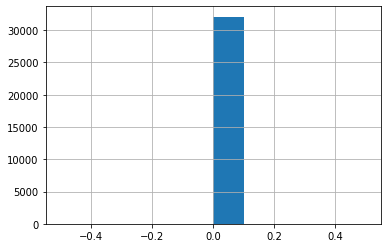

In [76]:
#Create dataframe with the predicted probabilities for the test dataset
test_dataset_sm = pd.DataFrame(predictions_test_set_sm)
test_dataset_sm[1].hist()
test_dataset_sm.head()

### We can see that there is no susbtantial difference between the prediction realized on the imbalanced and balanced dataset. This is mainly due by the fact that Adaboost is not sensitive to imbalanced data.